In [116]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit

In [117]:
with open('CabelDelay16ns.txt') as data:
    CD16_amp = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('CabelDelay16ns.txt') as data:
    CD16_counts = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('CabelDelay32ns.txt') as data:
    CD32_amp = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('CabelDelay32ns.txt') as data:
    CD32_counts = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('CabelDelay48ns.txt') as data:
    CD48_amp = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('CabelDelay48ns.txt') as data:
    CD48_counts = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('CabelDelay63ns.txt') as data:
    CD63_amp = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('CabelDelay63ns.txt') as data:
    CD63_counts = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

MW16: 3.048 pm 0.008780734348761105 SD16: 0.561 pm 0.009381700319428731
MW32: 4.725 pm 0.005530175891320641 SD32: 0.54 pm 0.005889357078163766
MW48: 6.368 pm 0.004841082992988257 SD48: 0.53 pm 0.005147796236129013
MW63: 7.903 pm 0.004562765332798112 SD63: 0.522 pm 0.004845498693851745
FWHM: 1.3201 1.271 1.248 1.229


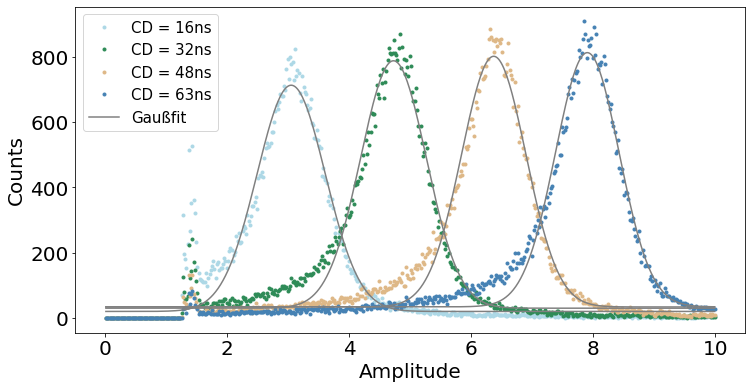

In [209]:
# Plot zur Ermittlung der Peakpositionen / Mittelwerte 
parameters = {'xtick.labelsize': 20,
             'ytick.labelsize': 20}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(figsize=(12,6))

#Plotten der unskalierten Kurven
ax.plot(CD16_amp, CD16_counts,'o',markersize=3, color = "lightblue",label = "CD = 16ns")
ax.plot(CD32_amp, CD32_counts,'o',markersize=3, color = "seagreen", label = "CD = 32ns")
ax.plot(CD48_amp, CD48_counts,'o',markersize=3, color="burlywood", label = "CD = 48ns")
ax.plot(CD63_amp, CD63_counts,'o',markersize=3,color = "steelblue", label = "CD = 63ns")

#Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt[0], popt[1] , popt[2], popt[3], pcov[2,2], pcov[3,3]

H16, A16, x016, sigma16, fehlermü16, fehlersd16 = gauss_fit(CD16_amp, CD16_counts)
print('MW16:',round(x016,3), 'pm', np.sqrt(fehlermü16), 'SD16:', round(sigma16,3), 'pm', np.sqrt(fehlersd16))

H32, A32, x032, sigma32, fehlermü32, fehlersd32 = gauss_fit(CD32_amp, CD32_counts)
print('MW32:',round(x032,3), 'pm', np.sqrt(fehlermü32), 'SD32:', round(sigma32,3), 'pm', np.sqrt(fehlersd32))

H48, A48, x048, sigma48, fehlermü48, fehlersd48 = gauss_fit(CD48_amp, CD48_counts)
print('MW48:',round(x048,3), 'pm', np.sqrt(fehlermü48), 'SD48:', round(sigma48,3), 'pm', np.sqrt(fehlersd48))

H63, A63, x063, sigma63, fehlermü63, fehlersd63 = gauss_fit(CD63_amp, CD63_counts)
print('MW63:',round(x063,3), 'pm', np.sqrt(fehlermü63), 'SD63:', round(sigma63,3), 'pm', np.sqrt(fehlersd63))

# Breite der Verteilung
FWHM16 = round(2.35482 * sigma16,4)
FWHM32 = round(2.35482 * sigma32,3)
FWHM48 = round(2.35482 * sigma48,3)
FWHM63 = round(2.35482 * sigma63,3)
print('FWHM:',FWHM16,FWHM32,FWHM48,FWHM63)

ax.plot(CD16_amp, gauss(CD16_amp, H16,A16,x016,sigma16), color = "grey", label="Gaußfit")
ax.plot(CD32_amp, gauss(CD32_amp, H32,A32,x032,sigma32), color = "grey")
ax.plot(CD48_amp, gauss(CD48_amp, H48,A48,x048,sigma48), color = "grey")
ax.plot(CD63_amp, gauss(CD63_amp, H63,A63,x063,sigma63), color = "grey")

ax.set_ylabel(r'Counts',fontsize = 20)
ax.set_xlabel(r'Amplitude', fontsize = 20)
ax.legend(fontsize=15)
fig.savefig('Peakpositionen.png', dpi=200)

[  9.68583848 -13.62715661]
[[ 0.00150614 -0.00830011]
 [-0.00830011  0.05068818]]


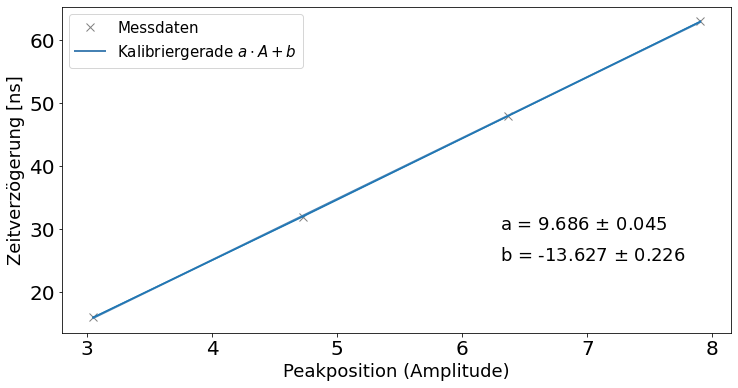

In [171]:
# Plotten der Mittelwerte über CD

MW = np.array([x0,x032,x048,x063])
CD = np.array([16,32,48,63])
xerr=np.array([0.009,0.006,0.005,0.005])

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(MW,CD,'x',color="grey",markersize=8, label="Messdaten")
ax.errorbar(MW,CD,xerr=xerr)

ax.set_ylabel(r'Zeitverzögerung [ns]',fontsize = 18)
ax.set_xlabel(r'Peakposition (Amplitude)', fontsize = 18)
ax.text(6.3, 30, 'a = 9.686 $\pm$ 0.045', fontsize = 18)
ax.text(6.3, 25, 'b = -13.627 $\pm$ 0.226', fontsize = 18)

#linearer Fit
def Gerade(x, m, y_0):
    return m*x + y_0

params, covariance_matrix = curve_fit(Gerade, MW, CD)
m, y_0 = params
ax.plot(MW, Gerade(MW, m, y_0),linewidth=2,color="steelblue",label="Kalibriergerade $a \cdot A + b$")
print(params)
print(covariance_matrix)

ax.legend(fontsize=15)
fig.savefig('Zeit Kalibriergerade.png', dpi=200)

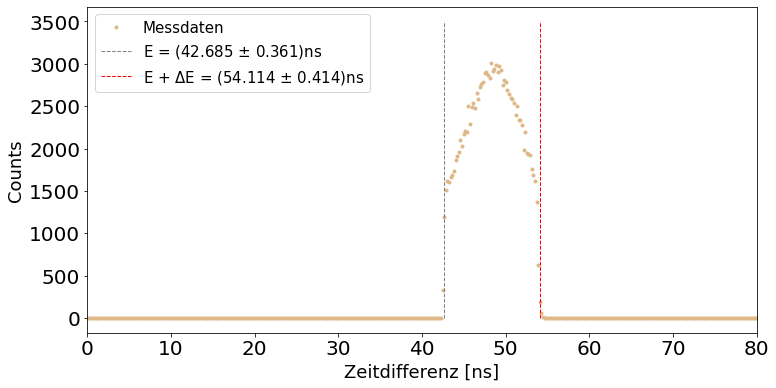

In [207]:
# Koinzidenzfenster in Zeiteinheiten
with open('Koinzidenzzeitfenster48nsE3,0DeltaE0,88.txt') as data:
    deltat_A = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('Koinzidenzzeitfenster48nsE3,0DeltaE0,88.txt') as data:
    counts = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")
    
parameters = {'xtick.labelsize': 20,
             'ytick.labelsize': 20}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(figsize=(12,6))

deltat= 9.686*deltat_A - 13.627
ax.plot(deltat, counts,'o',markersize=3, color = "burlywood",label = "Messdaten")
ax.plot([42.685,42.685],[0,3500], 'r--', linewidth=1, color = "grey",label="E = (42.685 $\pm$ 0.361)ns")
ax.plot([54.114,54.114],[0,3500], 'r--', linewidth=1, color = "red", label = "E + $\Delta$E = (54.114 $\pm$ 0.414)ns")

ax.set_ylabel(r'Counts',fontsize = 18)
ax.set_xlabel(r'Zeitdifferenz [ns]', fontsize = 18)
ax.set_xlim(0,80)
ax.legend(fontsize=15,loc = "upper left")

fig.savefig('Zeitdifferenzspektrum.png', dpi=200)